In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




# Load data
data = pd.read_csv(r"CLEAN_DATA\Europe_2015_manifesto_gini_ps.csv")

# Drop the rows that have missing values
data.dropna(subset=['Gini coefficient'], inplace=True)

X = data[['stance_positivity_score']] # IV
y = data['Gini coefficient'] # DV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Combine coefficients into a single array for statsmodels
coefficients_statsmodels = np.concatenate(([intercept], coefficients))

# Predict Gini index values on training and testing sets
predicted_gini_train = model.predict(X_train)
predicted_gini_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, predicted_gini_train, squared=False)
test_rmse = mean_squared_error(y_test, predicted_gini_test, squared=False)
train_r2 = r2_score(y_train, predicted_gini_train)
test_r2 = r2_score(y_test, predicted_gini_test)

# Add predicted Gini index to the DataFrame
data['Predicted_Gini'] = model.predict(X)

# Use statsmodels to further analyze the regression
X_with_intercept = sm.add_constant(X)  # Add intercept to X for statsmodels
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Print the summary of the regression results from statsmodels
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Gini coefficient   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.67
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           0.000132
Time:                        16:11:06   Log-Likelihood:                 2533.6
No. Observations:                2080   AIC:                            -5063.
Df Residuals:                    2078   BIC:                            -5052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\Vincent\AppData\Local\Temp\ipykernel_1552\2457249015.py:16: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"CLEAN_DATA\Europe_2015_manifesto_gini_ps.csv")


In [2]:
import matplotlib.pyplot as plt

# Drop irrelevant columns
col_todrop = ['Unnamed: 0.1', 'Unnamed: 0', 'eumember', 'date', 'coderid', 'manual', 'coderyear', 'testresult', 'testeditsim', 'planeco', 'welfare', 'total']
data = data.drop(columns=col_todrop)
correlations = data.select_dtypes(include="number").corr()

display(correlations)

,country,oecdmember,party,parfam,pervote,voteest,presvote,absseat,totseats,progtype,...,per608_2,per608_3,per703_1,per703_2,rile,markeco,intpeace,Gini coefficient,stance_positivity_score,Predicted_Gini
country,1.000000,-0.624147,0.999980,0.109068,0.113513,0.086453,-0.421338,0.058432,-0.051740,0.171825,...,-0.264337,-0.021062,0.246822,-0.137485,0.027454,-0.034101,-0.068155,0.666590,0.213885,0.213885
oecdmember,-0.624147,1.000000,-0.624410,-0.089408,0.010376,-0.103026,0.272970,0.150710,0.340950,-0.171212,...,0.218305,0.012436,-0.247546,0.103202,-0.122541,-0.015806,0.000305,-0.341977,-0.204641,-0.204641
party,0.999980,-0.624410,1.000000,0.111691,0.112620,0.086357,-0.422339,0.058056,-0.051563,0.171833,...,-0.263668,-0.020881,0.247458,-0.137105,0.029247,-0.033333,-0.068853,0.666239,0.213988,0.213988
parfam,0.109068,-0.089408,0.111691,1.000000,-0.123119,-0.041513,-0.193943,-0.068422,0.021201,0.052895,...,0.002083,-0.009010,0.176716,0.004203,0.121279,0.075061,-0.069743,0.104429,0.021739,0.021739
pervote,0.113513,0.010376,0.112620,-0.123119,1.000000,-0.094113,0.954863,0.766195,0.072409,-0.072771,...,0.033659,-0.011062,0.028463,-0.043502,0.070683,0.103505,-0.017150,0.076965,0.096484,0.096484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
markeco,-0.034101,-0.015806,-0.033333,0.075061,0.103505,-0.003394,0.106024,0.075871,-0.032018,0.021744,...,0.031723,0.012805,0.054398,0.021248,0.453117,1.000000,-0.102464,-0.084319,-0.120044,-0.120044
intpeace,-0.068155,0.000305,-0.068853,-0.069743,-0.017150,-0.015901,0.151922,0.026703,0.081441,-0.040749,...,-0.088017,-0.010402,-0.116538,-0.011986,-0.100481,-0.102464,1.000000,0.007410,-0.182721,-0.182721
Gini coefficient,0.666590,-0.341977,0.666239,0.104429,0.076965,0.116471,-0.313410,0.126310,0.189741,0.223074,...,-0.189494,-0.003546,0.153642,-0.117257,-0.068138,-0.084319,0.007410,1.000000,0.083724,0.083724
stance_positivity_score,0.213885,-0.204641,0.213988,0.021739,0.096484,0.020570,0.122984,0.014284,-0.114304,-0.355399,...,-0.124240,-0.026699,0.286608,-0.060990,0.063953,-0.120044,-0.182721,0.083724,1.000000,1.000000


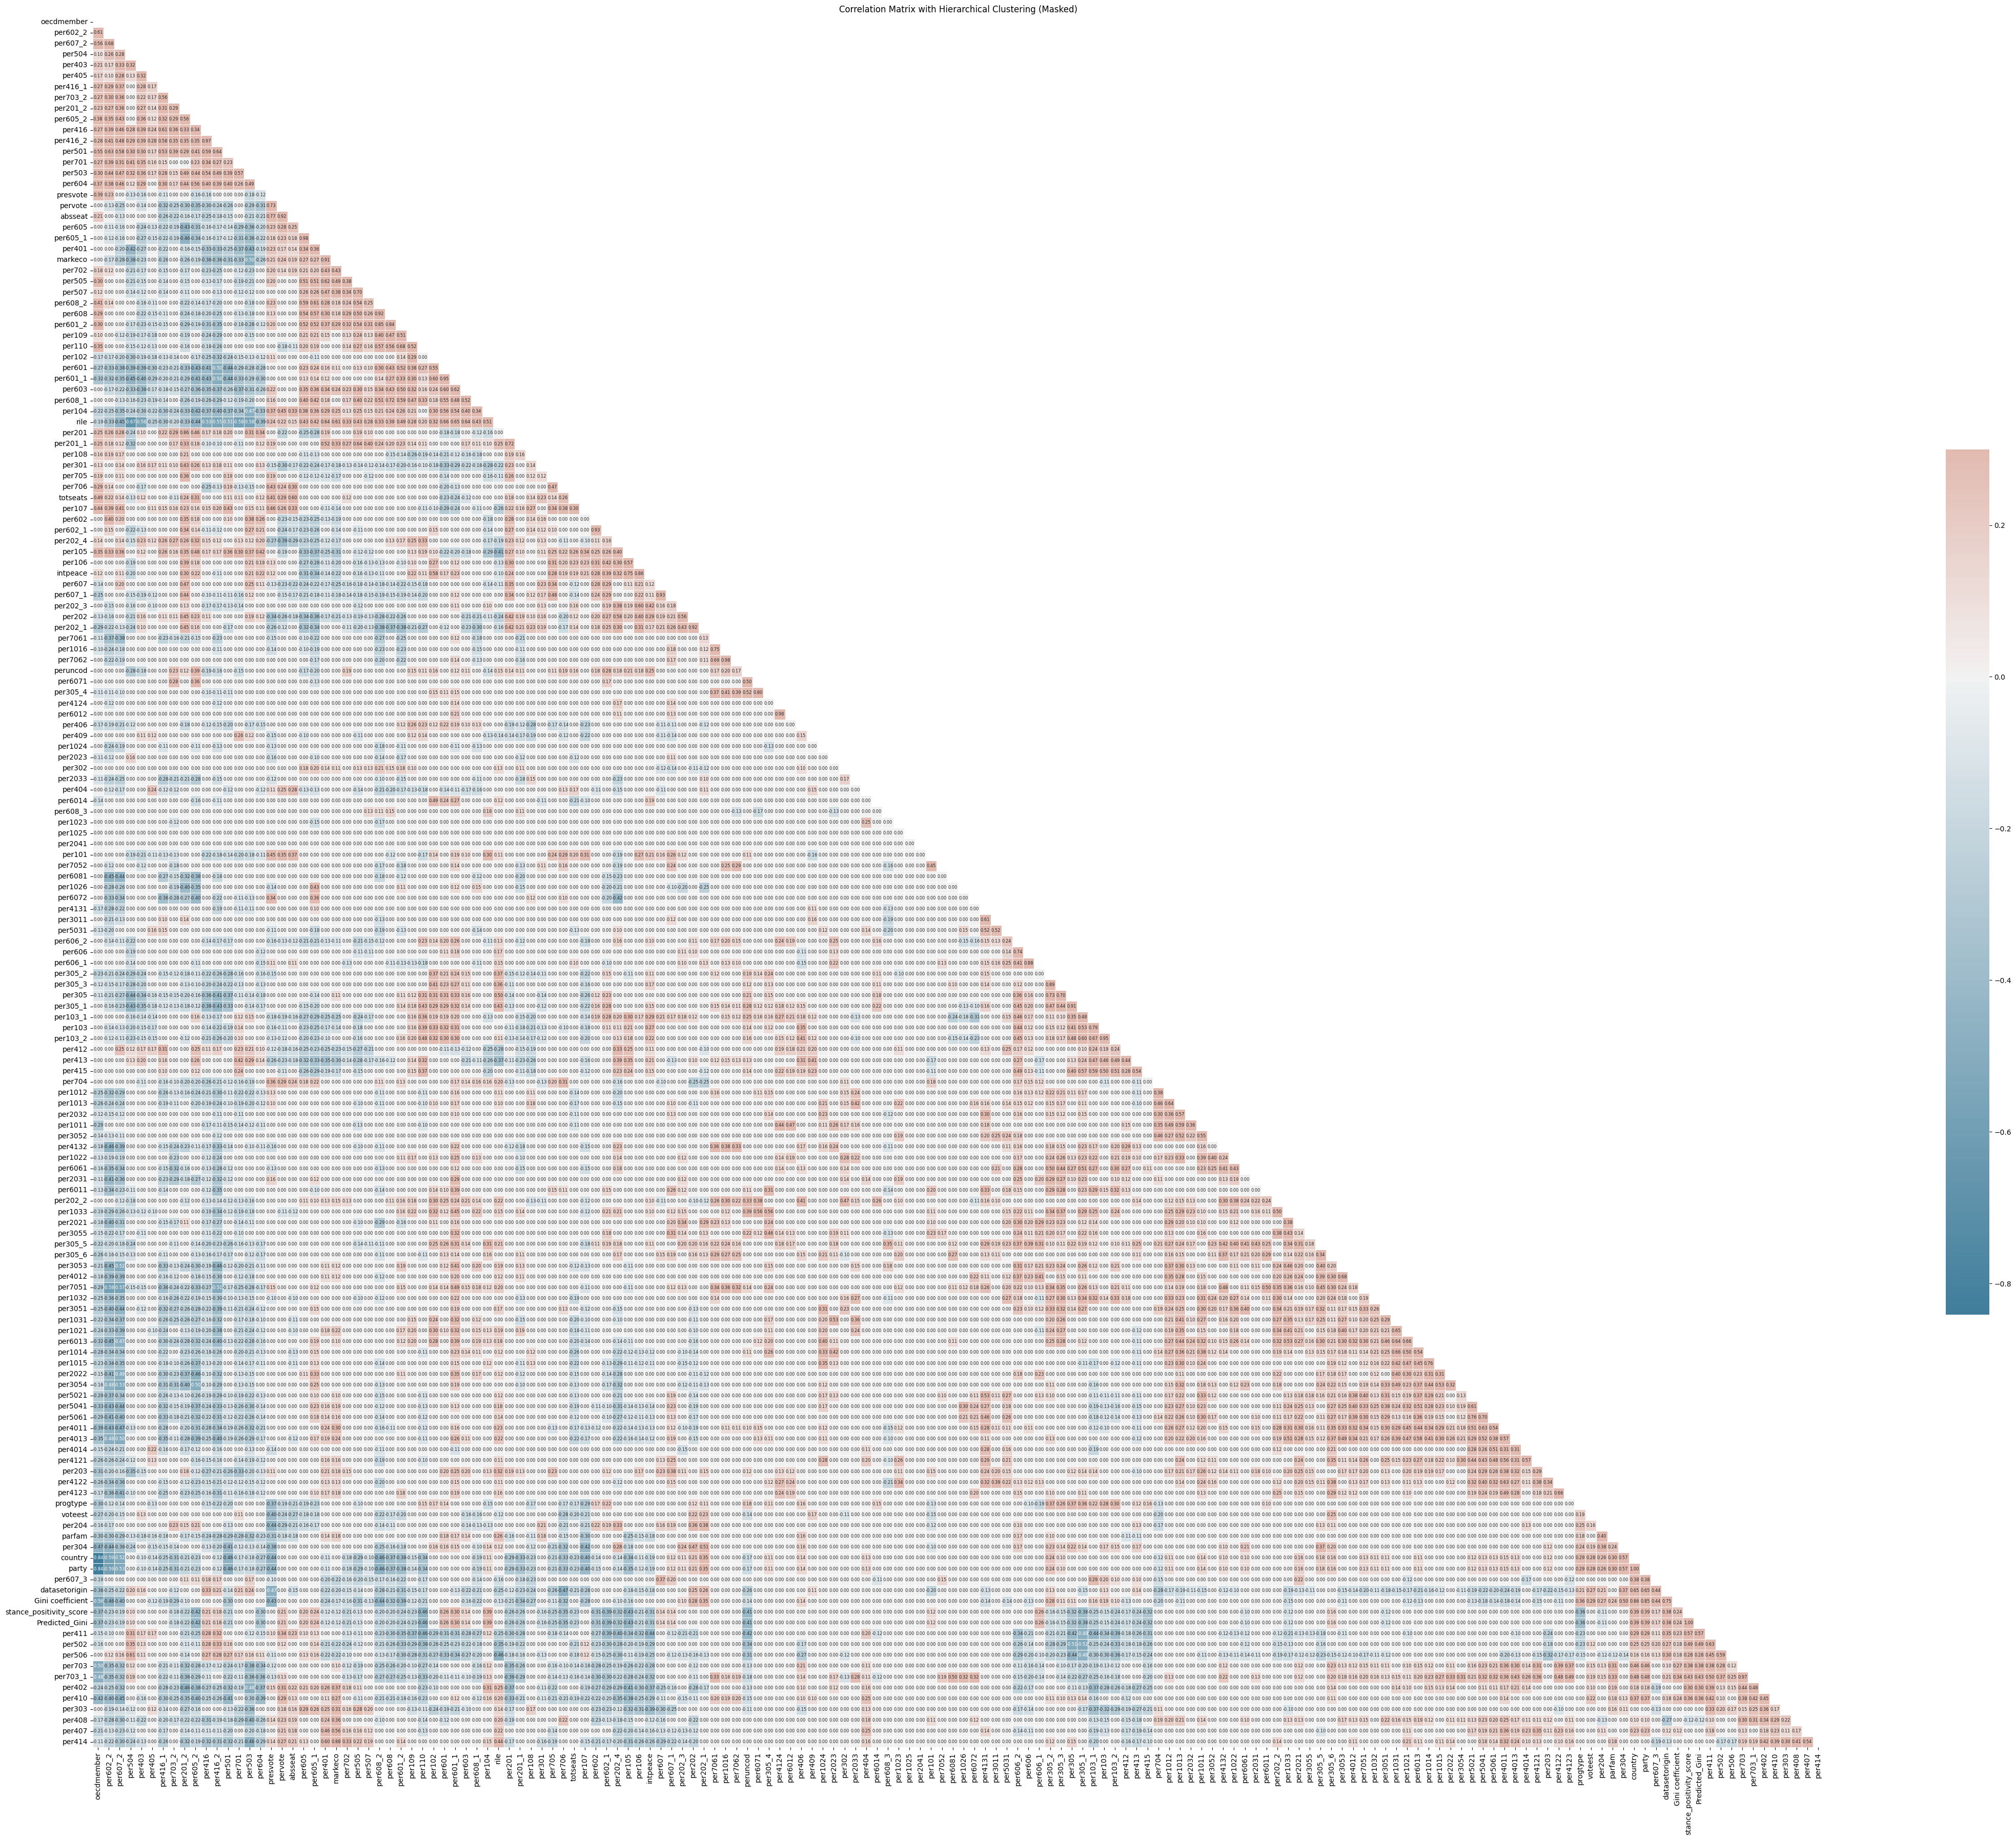

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy

# Calculate the Correlation Matrix
corr = correlations.corr()

# Define the threshold deviation value for masking close-to-zero correlations
threshold_deviation = 0.1

# Mask values close to zero in the correlation matrix
mask = np.abs(corr) < threshold_deviation

# Apply the mask to replace close-to-zero values with NaN
corr_masked = corr.mask(mask)

# Replace NaN values with a specified value (e.g., zero)
corr_masked_cleaned = corr_masked.fillna(0)

# Hierarchical clustering to reorder variables based on their correlation patterns
linkage = hierarchy.ward(corr_masked_cleaned)
order = hierarchy.dendrogram(linkage, no_plot=True)['leaves']
corr_reordered = corr_masked_cleaned.iloc[order, :].iloc[:, order]

# Define a diverging color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create a heatmap
plt.figure(figsize=(48, 36))
mask = np.triu(np.ones_like(corr_reordered, dtype=bool))
sns.heatmap(corr_reordered, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
            annot_kws={"size": 6})

plt.title('Correlation Matrix with Hierarchical Clustering (Masked)')
plt.tight_layout()
plt.show()


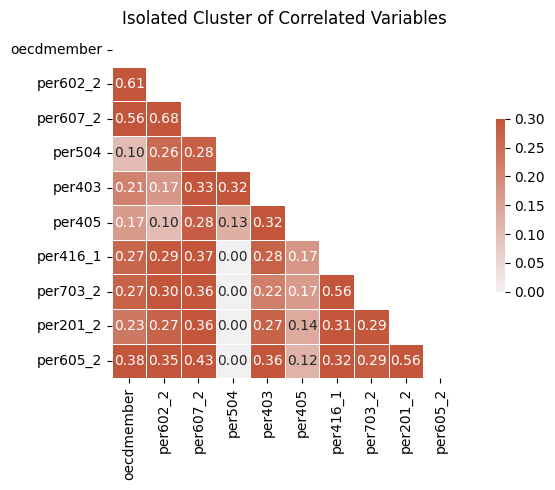

In [4]:
# Define the size of the top cluster
cluster_size = 10

# Create a new figure for the isolated cluster
plt.figure(figsize=(8, 5))

# Mask for the isolated cluster
mask_cluster = np.triu(np.ones_like(corr_reordered.iloc[:cluster_size, :cluster_size], dtype=bool))

# Plot the isolated cluster
sns.heatmap(corr_reordered.iloc[:cluster_size, :cluster_size], mask=mask_cluster, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
            annot_kws={"size": 10, "ha": 'center', "va": 'center'})

plt.title('Isolated Cluster of Correlated Variables')
plt.tight_layout()
plt.show()

In [5]:
columns_to_keep = ['Gini coefficient']

# Drop columns not in the subset
corr_subset = corr.loc[:, columns_to_keep]


In [6]:
corr_subset.loc[(corr_subset['Gini coefficient'] > 0.3) | (corr_subset['Gini coefficient'] < -0.3)]

,Gini coefficient
country,0.855400
oecdmember,-0.558196
party,0.854822
presvote,-0.431202
progtype,0.361642
datasetorigin,0.746332
per304,0.501542
per505,-0.309538
per608,-0.323778
per706,-0.324430
